In [1]:
%matplotlib inline
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")
from sklearn.datasets import fetch_openml
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)

# Print training dataset
print("Image Data Shape" , X.shape)

# Print lables
print("Label Data Shape", y.shape)

# Splitting Data into Training and Test Sets (MNIST)
train_img, test_img, train_lbl, test_lbl = train_test_split(
    X, y, test_size=0.14, random_state=0)



Image Data Shape (70000, 784)
Label Data Shape (70000,)


0.9093970003060912


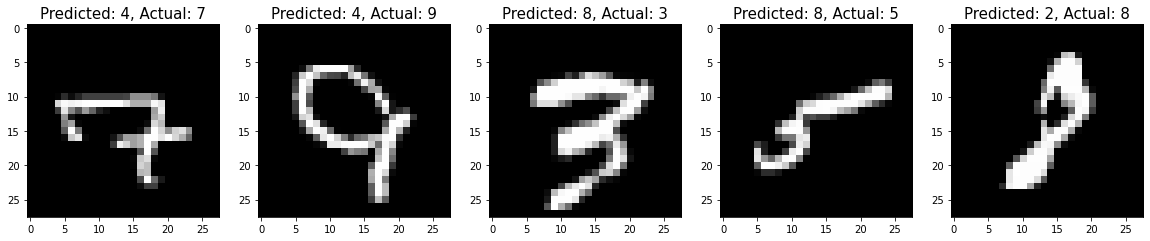

In [2]:

logisticRegr = LogisticRegression(multi_class='ovr', solver='lbfgs')
logisticRegr.fit(train_img, train_lbl)
# Returns a NumPy Array
# Predict for One Observation (image)
logisticRegr.predict(test_img[0].reshape(1,-1))
# Make predictions on entire test data
predictions = logisticRegr.predict(test_img)

score = logisticRegr.score(test_img, test_lbl)
print(score)

index = 0
misclassifiedIndexes = []
for label, predict in zip(test_lbl, predictions):
    if label != predict: 
        misclassifiedIndexes.append(index)
    index +=1
    
# Display Misclassified images with Predicted Labels (MNIST)
plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:5]):
    plt.subplot(1, 5, plotIndex + 1)
    plt.imshow(np.reshape(test_img[badIndex], (28,28)), cmap=plt.cm.gray)
    plt.title('Predicted: {}, Actual: {}'.format(predictions[badIndex], test_lbl[badIndex]), fontsize = 15)
    

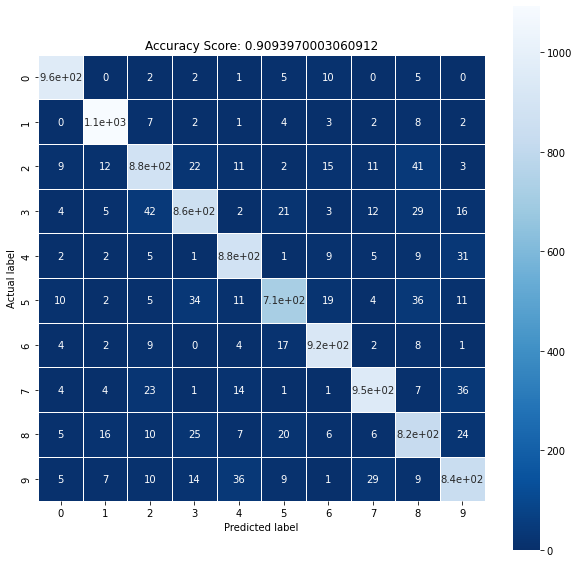

In [3]:
cm = metrics.confusion_matrix(y_true=test_lbl, 
                         y_pred = predictions, 
                        labels = logisticRegr.classes_)
cm

plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, 
            linewidths=.5, square = True, cmap = 'Blues_r');

plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title);
